In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('Churn_Modelling.csv')
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
221,222,15787155,Yang,514,Spain,Male,30,7,0.00,1,0,1,125010.24,0
6749,6750,15653404,Aliyev,684,Spain,Female,24,9,79263.90,1,0,1,196574.48,0
6581,6582,15598744,Ch'ang,576,Germany,Female,71,6,140273.47,1,1,1,193135.25,1
60,61,15651280,Hunter,742,Germany,Male,35,5,136857.00,1,0,0,84509.57,0
1249,1250,15803681,Sims,803,France,Female,26,4,0.00,2,1,1,181208.47,0
2063,2064,15571305,Stephenson,588,Germany,Female,35,1,103060.63,1,1,0,179866.01,1
2557,2558,15714634,Nebechi,837,France,Male,26,4,89900.24,2,1,0,175477.03,0
7684,7685,15808223,Lea,615,Spain,Male,41,1,126773.43,1,1,1,55551.26,0
7189,7190,15701885,Tucker,647,France,Female,40,9,0.00,2,0,1,92357.21,0
3737,3738,15607577,Roberts,663,Spain,Male,27,8,0.00,1,1,1,188007.99,0


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
def unique_columns(df):
    for columns in df:
        if df[columns].dtypes=='object':
            print(f'{columns}:{df[columns].unique()}')
unique_columns(df)       

Surname:['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [9]:
df['gender_le']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_le
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [10]:
from sklearn.preprocessing import LabelEncoder
le_Surname=LabelEncoder()
le_Geography=LabelEncoder()
df['Surname_n']=le_Surname.fit_transform(df['Surname'])
df['Geography_n']=le_Geography.fit_transform(df['Geography'])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_le,Surname_n,Geography_n
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1115,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1177,2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,2040,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,289,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1822,2


In [15]:
target=df.drop(['Surname','Geography','Gender','CustomerId','RowNumber','Exited'],axis='columns')
target.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender_le,Surname_n,Geography_n
0,619,42,2,0.00,1,1,1,101348.88,0,1115,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1177,2
2,502,42,8,159660.80,3,1,0,113931.57,0,2040,0
3,699,39,1,0.00,2,0,0,93826.63,0,289,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1822,2


In [18]:
cols_to_scale=['CreditScore','Age','Balance','EstimatedSalary','Surname_n','Tenure']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
target[cols_to_scale]=scaler.fit_transform(target[cols_to_scale])
target.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender_le,Surname_n,Geography_n
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,0,0.380416,0
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0.401569,2
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,0,0.696008,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0.098601,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0.621631,2


In [20]:
X=target
y=df.Exited
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=5)
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

In [24]:
len(X_train.columns)

11

In [29]:
model=keras.Sequential([
    keras.layers.Dense(7,input_shape=(11,),activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)
    

Epoch 1/100
250/250 [==============================] - 1s 937us/step - loss: 0.5660 - accuracy: 0.7706
Epoch 2/100
250/250 [==============================] - 0s 994us/step - loss: 0.4954 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 987us/step - loss: 0.4798 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 962us/step - loss: 0.4616 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 0s 943us/step - loss: 0.4511 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 0s 917us/step - loss: 0.4484 - accuracy: 0.7960
Epoch 9/100
250/250 [==============================] - 0s 950us/step - loss: 0.4449 - accuracy: 0.7960
Epoch 10/100
250/250 [==============================] - 0s 920us/step - loss:

In [30]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 905us/step - loss: 0.3733 - accuracy: 0.8400


[0.373330682516098, 0.8399999737739563]

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

63/63 [==============================] - 0s 672us/step


In [34]:
y_pred[:5]

array([[0.06756567],
       [0.08702552],
       [0.14504594],
       [0.09536191],
       [0.0664636 ]], dtype=float32)

In [36]:
yp=model.predict(X_test)
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

63/63 [==============================] - 0s 2ms/step


In [37]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1595
           1       0.67      0.40      0.51       405

    accuracy                           0.84      2000
   macro avg       0.77      0.68      0.71      2000
weighted avg       0.82      0.84      0.82      2000



Text(70.72222222222221, 0.5, 'Truth')

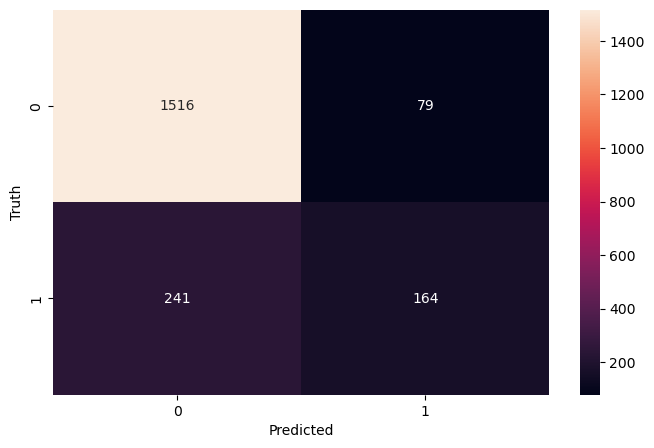

In [39]:
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')